In [31]:
%pylab inline

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.collections import PatchCollection

from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

import numba as nb
import time

Populating the interactive namespace from numpy and matplotlib


In [32]:
G = 6.67e-8

dt = 1e-2
stepN = 100

In [33]:
# xyDistribution = [
#                  [1000.0, 1000.0],
#                  [-1000.0, -1000.0],
#                  [-1000.0, 1000.0]
#                  ]

#xyDistribution=np.array(xyDistribution)
#print(xyDistribution.shape)
nParticles = 100
xyDistribution = np.random.normal(0, 5e7, size = (nParticles, 2))
velocityDistribution = np.zeros_like(xyDistribution, dtype = np.float)


#mDistribution = [3e14, 3e14, 3e14]
mDistribution = np.ones(nParticles, dtype=float) * 2e27

ParticlePositionHistory = np.zeros((stepN,nParticles,2))

timeArray = np.zeros(stepN)
for i in range(stepN):
    timeArray[i] = i*dt

[]

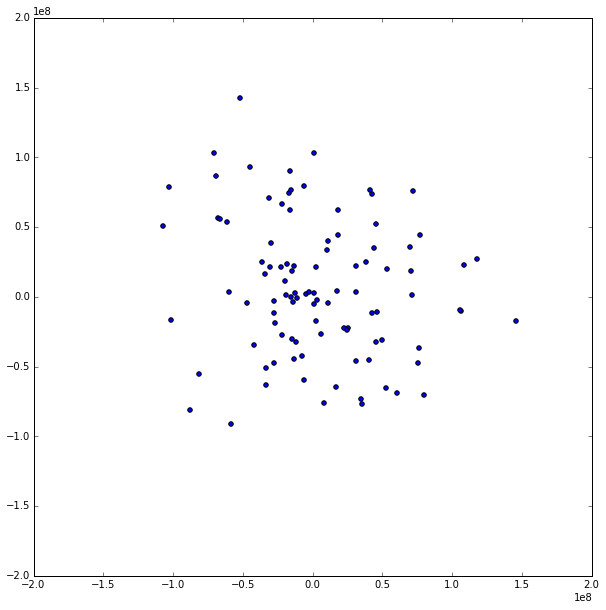

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.xlim(-2e8, 2e8)
plt.ylim(-2e8, 2e8)
plt.plot()

In [35]:
def gravityvelocity(dt, stepN):
    
    global velocityDistribution
    global xyDistribution
    
    deltaV = np.zeros_like(xyDistribution, dtype = np.float)
    #t = 0
    for i in range(stepN):
        #t+=dt
        #print(i)
        for j in range(0, len(mDistribution)):
            for k in range(0, len(mDistribution)):
                if (k!=j):
                    xdist = (xyDistribution[j,0]-xyDistribution[k,0])
                    ydist = (xyDistribution[j,1]-xyDistribution[k,1])
                    #print(xdist)
                    #print(ydist)

                    if(xdist==0):
                        deltaV[j,0] += 0
                    elif(xdist!=0):
                        deltaV[j,0] += -G*mDistribution[j]*xdist/((np.sqrt(xdist**2+ydist**2))**3)
                        #print("blah", -G*mDistribution[i]/(np.sqrt(abs(position[j,0]-position[i,0]))**2))
                        #print("v", i, "x", velocityDistribution[i,0])

                    if(ydist==0):
                        deltaV[j,1] += 0
                    elif(ydist!=0):
                        deltaV[j,1] += -G*mDistribution[j]*ydist/((np.sqrt(xdist**2+ydist**2))**3)
                        #print("v", i, "y", velocityDistribution[i,1])
        
        velocityDistribution += dt*deltaV
        #print("2nd", i)
        xyDistribution += dt*velocityDistribution
        ParticlePositionHistory[i,:,:] = xyDistribution
        #print(i, ParticlePositionHistory)
    print(np.sqrt(xdist**2+ydist**2))

In [36]:
# def position(dt, stepN):
    
#     global xyDistribution
    
#     for i in range(stepN):
#         xyDistribution += dt*velocitydistribution

In [37]:
# def RK1(f, dt, position, velocity, stepN):
    
#     t = 0
#     for i in range(stepN):
#         t+=dt
#         velocity += dt*gravity(position, velocity)
#         ParticlePositionHistory[:,:,i] = position #WRONG
#     #print(position)
#     #print(position.shape)
#     return position

In [38]:
xyDistributionOld = np.copy(xyDistribution) 


# numbaRK = nb.autojit(RK1)
# numbaGrav = nb.autojit(gravity)
t0 = time.time()
# velocityDistribution = RK1(gravity, dt, xyDistribution, velocityDistribution, stepN)
# xyDistribution = RK1()
gravityvelocity(dt,stepN)
#position(dt,stepN)
t1 = time.time()
print(t1-t0)
print (xyDistribution-xyDistributionOld)


263865363.578
5.45433592796
[[  4.88113587e+07  -4.99219069e+07]
 [ -6.29859443e+07   5.10295677e+08]
 [  2.74017827e+08   1.18596410e+08]
 [ -3.58284968e+09   4.47983236e+09]
 [  1.80343278e+10   4.97738334e+10]
 [  6.77662821e+09   1.56118922e+09]
 [  1.38357906e+07  -2.25183351e+07]
 [ -2.87688978e+07  -3.15183147e+07]
 [ -1.72604800e+08   2.34624037e+08]
 [  1.79322195e+08  -1.87396259e+08]
 [  1.67810844e+08  -1.40819441e+08]
 [  5.64946366e+07  -1.94282229e+07]
 [  8.68874325e+07  -3.97824681e+08]
 [  3.29883852e+08   1.14917856e+08]
 [ -5.61910565e+08  -2.12309444e+08]
 [  2.57142558e+07   4.95248592e+07]
 [ -2.85676769e+07   6.85167771e+06]
 [  5.70658695e+07   1.26034144e+07]
 [ -4.47219986e+07   7.55127053e+06]
 [ -1.17646049e+08  -5.95411187e+07]
 [ -8.07900994e+07   1.47345284e+08]
 [ -1.64997964e+06  -6.25094591e+07]
 [  5.12620436e+08   4.41786189e+09]
 [ -1.27266604e+07   1.85083469e+06]
 [ -1.80624558e+10  -4.97374201e+10]
 [  3.56290039e+09  -4.51319011e+09]
 [ -3.6011

[]

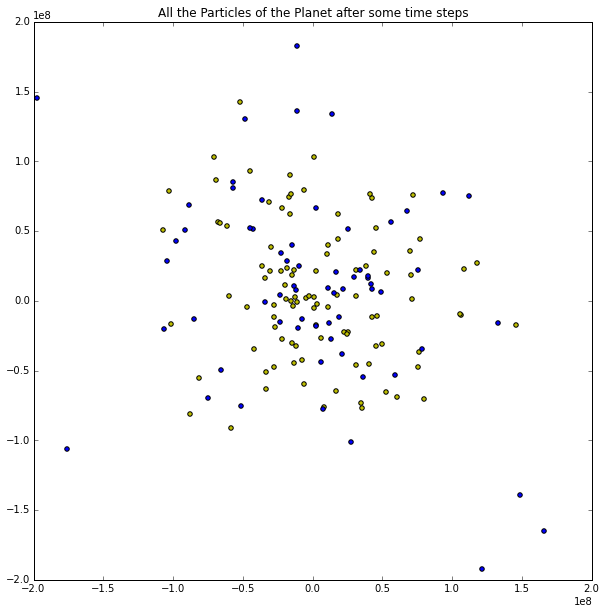

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(xyDistributionOld[:,0], xyDistributionOld[:,1], c='y')
plt.scatter(xyDistribution[:,0], xyDistribution[:,1], c='b')
plt.title("All the Particles of the Planet after some time steps")
plt.xlim(-2e8, 2e8)
plt.ylim(-2e8, 2e8)
plt.plot()
#print(ParticlePositionHistory)

# plt.figure(figsize=(10,10))
# plt.scatter(ParticlePositionHistory[9,:,0], ParticlePositionHistory[9,:,1])
# plt.xlim(-2000, 2000)
# plt.ylim(-2000, 2000)
# plt.plot()


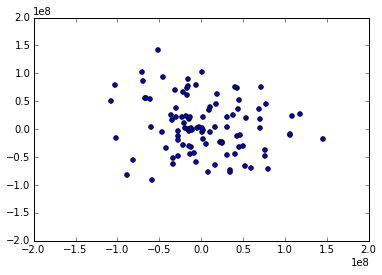

In [40]:
slider = FloatSlider(description='Time', min=0, max=stepN, step=1)

def update_plot():
    time=slider.value
    x = ParticlePositionHistory[time-1,:,0]
    y = ParticlePositionHistory[time-1,:,1]
    fig = plt.figure()
    plt.scatter(x, y)
    plt.xlim(-2e8,2e8)
    plt.ylim(-2e8,2e8)

    clear_output(True)

slider.on_trait_change(update_plot, 'value')


display(slider)
update_plot()